In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv


In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):
    with open(filename) as training_file:
        images=np.array([])
        labels=np.array([])
        
        lis=list(training_file)
        
        lis=np.array(lis[1:])
        
        int_lis=[]
        array=np.zeros((len(lis),785))
        
        for i in range(len(lis)):
            array[i]=lis[i].split(',')
        
        array=array.astype(np.float32)
        
        labels=array[:,0].reshape((len(lis),))
        images=array[:,1:].reshape((len(lis),28,28))

    
    return images, labels

path_sign_mnist_train = '/kaggle/input/sign-language-mnist/sign_mnist_train.csv'
path_sign_mnist_test = '/kaggle/input/sign-language-mnist/sign_mnist_test.csv'
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)



In [4]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1./255.
)

validation_datagen = ImageDataGenerator(
    rescale=1./255.)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(24,activation='softmax')])
    # Your Code Here
    

# Compile Model. 
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Train the Model
history = model.fit_generator(train_datagen.flow(training_images,lb.fit_transform(training_labels),batch_size=128),validation_data=validation_datagen.flow(testing_images,lb.fit_transform(testing_labels)),epochs=5,steps_per_epoch=200,validation_steps=20)

model.evaluate(testing_images, lb.fit_transform(testing_labels), verbose=0)

Train for 200 steps, validate for 20 steps
Epoch 1/10
200/200 [==============================] - 6s 31ms/step - loss: 1.3492 - accuracy: 0.6167 - val_loss: 0.7611 - val_accuracy: 0.7797
Epoch 2/10
200/200 [==============================] - 6s 30ms/step - loss: 0.2247 - accuracy: 0.9424 - val_loss: 0.4416 - val_accuracy: 0.8625
Epoch 3/10
200/200 [==============================] - 6s 31ms/step - loss: 0.0541 - accuracy: 0.9931 - val_loss: 0.4065 - val_accuracy: 0.8719
Epoch 4/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0167 - accuracy: 0.9996 - val_loss: 0.3295 - val_accuracy: 0.8875
Epoch 5/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0077 - accuracy: 0.9999 - val_loss: 0.3547 - val_accuracy: 0.8844
Epoch 6/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3669 - val_accuracy: 0.8813
Epoch 7/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0043 - accuracy: 0.999

KeyboardInterrupt: 

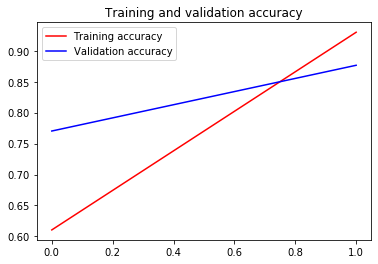

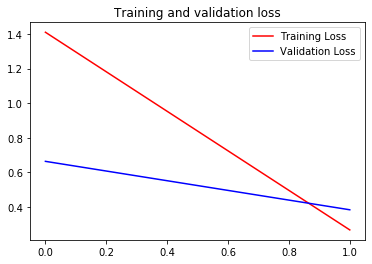

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()